<a href="https://colab.research.google.com/github/deepanshumehtaa/CNN/blob/master/XOR_gates_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xor Rule => odd 1 = 1  (oo = o)

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

from matplotlib import pyplot

In [0]:
# Callbacks 
# early stopping of training via a callback called EarlyStopping.

ACCURACY_THRESHOLD = 0.900

class monitering(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('binary_accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

In [0]:

training_data = np.array([ [0,0,0], [0,0,1], [0,1,0],
                           [1,0,1], [1,0,0], [0,1,1],
                           [1,1,0], [1,1,1]], "float32")

# the four expected results in the same order
target_data = np.array([ [0],[1],[1],
                         [0],[1],[0],
                         [0],[1]],"float32")

model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])


# With Callback
obj = monitering()
hist = model.fit(training_data, target_data, nb_epoch=300, verbose=2,callbacks=[obj])



#with Early stoping monitering Accuracy
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# model.fit(training_data, target_data, nb_epoch=500, verbose=2,callbacks=[es])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/300
 - 2s - loss: 0.2502 - binary_accuracy: 0.5000
Epoch 2/300
 - 0s - loss: 0.2497 - binary_accuracy: 0.5000
Epoch 3/300
 - 0s - loss: 0.2492 - binary_accuracy: 0.5000
Epoch 4/300
 - 0s - loss: 0.2486 - binary_accuracy: 0.5000
Epoch 5/300
 - 0s - loss: 0.2480 - binary_accuracy: 0.6250
Epoch 6/300
 - 0s - loss: 0.2475 - binary_accuracy: 0.6250
Epoch 7/300
 - 0s - loss: 0.2469 - binary_accuracy: 0.6250
Epoch 8/300
 - 0s - loss: 0.2464 - binary_accuracy: 0.6250
Epoch 9/300
 - 0s - loss: 0.2459 - binary_accuracy: 0.6250
Epoch 10/300
 - 0s - loss: 0.2454 - binary_accuracy: 0.6250
Epoch 11/300
 - 0s - loss: 0.2449 - binary_accuracy: 0.6250
Epoch 12/300
 - 0s - loss: 0.2445 - binary_accuracy: 0.6250
Epoch 13/300
 - 0s - loss: 0.2441 - binary_accuracy: 0.8750
Epoch 14/300
 - 0s - loss: 0.2437 - binary_accuracy: 0.8750
Epoch 15/300
 - 0s - loss: 0.2433 - binary_accuracy: 0.8750
Epoch 16/300
 - 0s - loss: 0.2429 - binary_accuracy: 0.8750
Epoch 17/300
 - 0s - loss: 0.2425 - binary_accura

In [0]:
print( model.predict(training_data).round() )

print(hist.history.keys())  #propery of model (important)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
dict_keys(['loss', 'binary_accuracy'])


# Ploting

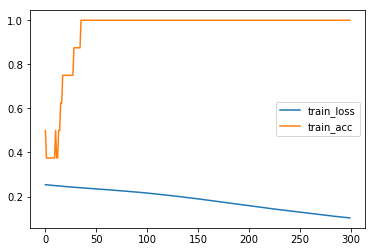

In [0]:
train_loss = hist.history['loss']
#val_loss   = hist.history['val_loss']
#train_acc  = hist.history['acc']
train_acc  = hist.history['binary_accuracy']
#val_acc    = hist.history['val_acc']

num_epochs = 300
xc         = range(num_epochs)


pyplot.figure()
pyplot.plot(xc, train_loss, label='train_loss')
pyplot.plot(xc, train_acc, label='train_acc')
pyplot.legend()
pyplot.show()